In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
import seaborn as sns
import matplotlib.pyplot as plt
from reader import generic_reader

## Data wrangling

Our dataset of movies are movies from the USA, from the periode 1/1/2000 to 31/12/2023 and with a vote count of atleast 1000

In [2]:
movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies.csv")
print(movies.info())
movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   adult                   27290 non-null  bool   
 1   backdrop_path           24958 non-null  object 
 2   budget                  27290 non-null  int64  
 3   homepage                11192 non-null  object 
 4   movie_id                27290 non-null  int64  
 5   imdb_id                 27150 non-null  object 
 6   origin_country          27290 non-null  object 
 7   original_language       27290 non-null  object 
 8   original_title          27289 non-null  object 
 9   overview                27275 non-null  object 
 10  popularity              27290 non-null  float64
 11  poster_path             27169 non-null  object 
 12  production_countries    27290 non-null  object 
 13  release_date            27290 non-null  object 
 14  revenue                 27290 non-null

,adult,backdrop_path,budget,homepage,movie_id,imdb_id,origin_country,original_language,original_title,overview,...,vote_average,vote_count,director_person_ids,genre_ids,production_company_ids,collection_id,cast_person_ids,cast_credit_ids,crew_person_ids,crew_credit_ids
0,False,/dD90r6NQ8cFgYjjYGSLRQLCdJWN.jpg,0,NaN,515728,tt0191181,['US'],en,Hitch,Two friends are on a road trip and a one-sided...,...,4.900,10,[131388],[18],[],NaN,"[1230580, 2030046]","['5ac28e640e0a260c140239f0', '5ae16159c3a36876...","[1434896, 131388, 131388, 131388, 131388, 1360...","['6454f309c044290143e43376', '6454f31187a27a01..."
1,False,/ifq88qw3vgoKlUyw0OAmPQCSqBc.jpg,0,NaN,300236,tt0259233,['US'],en,Carnage: The Legend of Quiltface,Four students set out for the barren Nevada de...,...,2.500,10,[103123],[27],"[4708, 110668]",NaN,"[98740, 99106, 98276, 1685427, 1771744, 177174...","['58bf16e6925141608406b270', '6251f3b9a6c10432...","[103123, 98868, 103123, 1001648, 103123, 10016...","['62c5bceaf794ad00bf5a8867', '62c5bce19ba86a00..."
2,False,/c5UlEYHM2xuSrfxESg1gZSpVAEB.jpg,0,NaN,96716,tt0128977,['US'],en,The Bumblebee Flies Anyway,An amnesiac youth tries to piece together his ...,...,6.200,30,[126537],"[18, 10749]","[1596, 1363]",NaN,"[109, 21197, 16407, 1223778, 38581, 303197, 56...","['52fe49be9251416c750d1f8f', '52fe49be9251416c...","[1534680, 2556479, 1516275, 68126, 1516278, 27...","['60c1e4cb39a45d0040c5cd4b', '60c1e503960cde00..."
3,False,NaN,0,NaN,71618,tt0198284,['US'],en,After Sex,A group of attractive women get together for a...,...,5.000,27,[176312],"[35, 18, 10749]","[85165, 86531]",NaN,"[170638, 12519, 15110, 3208, 51670, 61962, 117...","['53d9db080e0a2652f0001583', '52fe483ec3a36848...","[176312, 1470931, 33008, 17210, 17211, 954441,...","['52fe483ec3a368484e0ef37f', '5564e59bc3a36874..."
4,False,/nKD4M8Oyuh5aE9EBR29A9WnJKxE.jpg,0,NaN,66131,tt0346794,['US'],en,A Constant Forge,"One of the great mavericks of cinema, John Cas...",...,6.600,13,[544690],[99],[],NaN,"[11147, 5950, 10556, 10127, 856, 2314, 1629458...","['5a9dfc9e0e0a2671fb009de8', '5a9dfc11c3a36842...","[544690, 3399184, 544690, 961119, 3399183, 339...","['52fe472bc3a368484e0b89d9', '61f15d7dcd204600..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27285,False,/gub9e0qRZWmmzTV77A6T95HELIF.jpg,40000000,https://www.mgm.com/movies/the-boys-in-the-boat,823452,tt1856080,['US'],en,The Boys in the Boat,The triumphant underdog story of the Universit...,...,7.233,311,[1461],"[18, 36]","[1782, 143790, 210099]",NaN,"[33192, 1371041, 27172, 1522758, 1780950, 2725...","['6205b7c5ce5d8200c83376f3', '61c21146904f6d00...","[3069889, 1461, 17148, 1500871, 1578875, 18195...","['6088693d84448e007932a40c', '6088695754a09800..."
27286,False,/rSle4ix2IZ6UMgCDY8L3ngdOmSZ.jpg,90000000,https://www.warnerbros.com/movies/color-purple,558915,tt1200263,['US'],en,The Color Purple,A decades-spanning tale of love and resilience...,...,7.049,326,[1507725],[18],"[174, 3298, 56, 150841, 200643, 216687]",NaN,"[165909, 40036, 1075037, 91671, 1154054, 34767...","['61fc8db841429100a2189044', '61f966bfeee18600...","[3511353, 4445624, 4445622, 73350, 2167926, 21...","['62b89b15a61de103b61eed9b', '65876f514772155a..."
27287,False,/vhTsS3K79lsyZNZ7t33IQiSREsO.jpg,0,https://www.netflix.com/title/81449757,1215278,tt30225680,"['US', 'GB']",en,Hell Camp: Teen Nightmare,Out-of-control teens across America were sent ...,...,5.663,46,[2283876],[99],[26359],NaN,"[5332322, 38406]","['67e5d2703e65c8ea88ba1e0f', '67e60712421eb8c3...","[2283876, 3248862, 2060153, 4208975, 1414935, ...","['65734ffc1c635b00c3a9bfbe', '67e5d17f421eb8c3..."
27288,False,/zS1OiCw3opLQYxjmhqhOQ7D7YyD.jpg,0,NaN,1156189,tt28490873,['US'],en,Ryuichi Sakamoto: Opus,"""Ars longa, vita brevis"" – art is long, life i...",...,7.861,18,[2010321],"[10402, 99]","[188205, 11561, 4667, 46298]",NaN,[11382],['64bfde5d8c0a4800aeefb198'],"[3056, 1610252, 2247870, 3406563, 4240016, 152...","['64ec9e951feac100fe5e313e', '64ec9e33

We make a new dataframe keeping only the columns we want to use.
While making the dataframe we also change the genre_ids, cast_person_ids and crew_person_id from a string to Python lists and the release_date into a proper datetime format.

In [3]:
columns_to_keep = ['budget', 'movie_id', 'original_title', 'overview', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count', 'director_person_ids', 'genre_ids', 'collection_id', 'cast_person_ids', 'cast_credit_ids', 'crew_person_ids', 'crew_credit_ids']
df_movies = movies[columns_to_keep].copy()

df_movies['genre_ids'] = movies['genre_ids'].apply(ast.literal_eval)
df_movies['cast_person_ids'] = movies['cast_person_ids'].apply(ast.literal_eval)
df_movies['crew_person_ids'] = movies['crew_person_ids'].apply(ast.literal_eval)
df_movies['director_person_ids'] = movies['director_person_ids'].apply(ast.literal_eval)
df_movies['release_date'] = pd.to_datetime(movies['release_date'])
df_movies

,budget,movie_id,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,director_person_ids,genre_ids,collection_id,cast_person_ids,cast_credit_ids,crew_person_ids,crew_credit_ids
0,0,515728,Hitch,Two friends are on a road trip and a one-sided...,2000-01-01,0,18,4.900,10,[131388],[18],NaN,"[1230580, 2030046]","['5ac28e640e0a260c140239f0', '5ae16159c3a36876...","[1434896, 131388, 131388, 131388, 131388, 1360...","['6454f309c044290143e43376', '6454f31187a27a01..."
1,0,300236,Carnage: The Legend of Quiltface,Four students set out for the barren Nevada de...,2000-01-01,0,70,2.500,10,[103123],[27],NaN,"[98740, 99106, 98276, 1685427, 1771744, 177174...","['58bf16e6925141608406b270', '6251f3b9a6c10432...","[103123, 98868, 103123, 1001648, 103123, 10016...","['62c5bceaf794ad00bf5a8867', '62c5bce19ba86a00..."
2,0,96716,The Bumblebee Flies Anyway,An amnesiac youth tries to piece together his ...,2000-01-01,0,95,6.200,30,[126537],"[18, 10749]",NaN,"[109, 21197, 16407, 1223778, 38581, 303197, 56...","['52fe49be9251416c750d1f8f', '52fe49be9251416c...","[1534680, 2556479, 1516275, 68126, 1516278, 27...","['60c1e4cb39a45d0040c5cd4b', '60c1e503960cde00..."
3,0,71618,After Sex,A group of attractive women get together for a...,2000-01-01,0,96,5.000,27,[176312],"[35, 18, 10749]",NaN,"[170638, 12519, 15110, 3208, 51670, 61962, 117...","['53d9db080e0a2652f0001583', '52fe483ec3a36848...","[176312, 1470931, 33008, 17210, 17211, 954441,...","['52fe483ec3a368484e0ef37f', '5564e59bc3a36874..."
4,0,66131,A Constant Forge,"One of the great mavericks of cinema, John Cas...",2000-01-01,0,200,6.600,13,[544690],[99],NaN,"[11147, 5950, 10556, 10127, 856, 2314, 1629458...","['5a9dfc9e0e0a2671fb009de8', '5a9dfc11c3a36842...","[544690, 3399184, 544690, 961119, 3399183, 339...","['52fe472bc3a368484e0b89d9', '61f15d7dcd204600..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27285,40000000,823452,The Boys in the Boat,The triumphant underdog story of the Universit...,2023-12-25,54401583,124,7.233,311,[1461],"[18, 36]",NaN,"[33192, 1371041, 27172, 1522758, 1780950, 2725...","['6205b7c5ce5d8200c83376f3', '61c21146904f6d00...","[3069889, 1461, 17148, 1500871, 1578875, 18195...","['6088693d84448e007932a40c', '6088695754a09800..."
27286,90000000,558915,The Color Purple,A decades-spanning tale of love and resilience...,2023-12-25,68919191,141,7.049,326,[1507725],[18],NaN,"[165909, 40036, 1075037, 91671, 1154054, 34767...","['61fc8db841429100a2189044', '61f966bfeee18600...","[3511353, 4445624, 4445622, 73350, 2167926, 21...","['62b89b15a61de103b61eed9b', '65876f514772155a..."
27287,0,1215278,Hell Camp: Teen Nightmare,Out-of-control teens across America were sent ...,2023-12-27,0,90,5.663,46,[2283876],[99],NaN,"[5332322, 38406]","['67e5d2703e65c8ea88ba1e0f', '67e60712421eb8c3...","[2283876, 3248862, 2060153, 4208975, 1414935, ...","['65734ffc1c635b00c3a9bfbe', '67e5d17f421eb8c3..."
27288,0,1156189,Ryuichi Sakamoto: Opus,"""Ars longa, vita brevis"" – art is long, life i...",2023-12-27,0,103,7.861,18,[2010321],"[10402, 99]",NaN,[11382],['64bfde5d8c0a4800aeefb198'],"[3056, 1610252, 2247870, 3406563, 4240016, 152...","['64ec9e951feac100fe5e313e', '64ec9e335258ae01..."


We won't do any clean to the column Collection_id because it is for movies in a collection, like The Lord of the Rings: Fellowship of the Ring, The Lord of the Rings: The Two Towers and The Lord of the Rings: The Return of the King

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget               27290 non-null  int64         
 1   movie_id             27290 non-null  int64         
 2   original_title       27289 non-null  object        
 3   overview             27275 non-null  object        
 4   release_date         27290 non-null  datetime64[ns]
 5   revenue              27290 non-null  int64         
 6   runtime              27290 non-null  int64         
 7   vote_average         27290 non-null  float64       
 8   vote_count           27290 non-null  int64         
 9   director_person_ids  27290 non-null  object        
 10  genre_ids            27290 non-null  object        
 11  collection_id        3164 non-null   float64       
 12  cast_person_ids      27290 non-null  object        
 13  cast_credit_ids      27290 non-

We check the min value of the budget to see if any are missing 

In [5]:
print(df_movies['budget'].min())
print(df_movies.shape)

0
(27290, 16)


We'll check if any of the budget and revenue have the default 0

In [6]:
zero_budget_count = (df_movies['budget'] == 0).sum()
zero_revenue_count = (df_movies['revenue'] == 0).sum()

print(f"Rows with budget = 0: {zero_budget_count}")
print(f"Rows with revenue = 0: {zero_revenue_count}")

Rows with budget = 0: 20373
Rows with revenue = 0: 21392


Since we have a large set of data and the difference movies can have in budget and revenue, we'll drop the rows with a budget or renvenue of zero to stay as close to the true data as possible

In [7]:
df_movies = df_movies[(df_movies['budget'] != 0) & (df_movies['revenue'] != 0)].copy()

Genre ids seems to have a fine spread

In [8]:
df_movies['genre_ids'].explode().value_counts()

genre_ids
18       2001
35       1638
53       1213
28       1104
12        820
10749     792
80        695
27        570
10751     507
878       495
14        440
9648      400
16        282
36        203
10402     165
10752     117
99         81
37         52
10770      14
Name: count, dtype: int64

We also check for runtime to make sure no tv series have made its way into the data by a mistake

In [9]:
runtime = (df_movies['runtime'] <= 60).sum()
print(runtime)

5


Data about actors and actress will come from persons.csv

In [10]:
df_persons = generic_reader.read_csv_file_to_data_frame("movie_data/persons.csv")
print(df_persons.info())
df_persons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104928 entries, 0 to 104927
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 104928 non-null  bool   
 1   also_known_as         104928 non-null  object 
 2   biography             35263 non-null   object 
 3   birthday              40091 non-null   object 
 4   deathday              3729 non-null    object 
 5   gender                104928 non-null  int64  
 6   homepage              10229 non-null   object 
 7   person_id             104928 non-null  int64  
 8   imdb_id               81944 non-null   object 
 9   known_for_department  104928 non-null  object 
 10  name                  104928 non-null  object 
 11  place_of_birth        41492 non-null   object 
 12  popularity            104928 non-null  float64
 13  profile_path          61033 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory 

,adult,also_known_as,biography,birthday,deathday,gender,homepage,person_id,imdb_id,known_for_department,name,place_of_birth,popularity,profile_path
0,False,"['George Walton Lucas Jr. ', 'George Walton Lu...","George Walton Lucas Jr. (born May 14, 1944) is...",1944-05-14,NaN,2,NaN,1,nm0000184,Directing,George Lucas,"Modesto, California, USA",1.5338,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg
1,False,"['Mark Hamil', 'Mark Richard Hamill', 'Patrick...","Mark Richard Hamill (born September 25, 1951) ...",1951-09-25,NaN,2,NaN,2,nm0000434,Acting,Mark Hamill,"Oakland, California, USA",2.5029,/2ZulC2Ccq1yv3pemusks6Zlfy2s.jpg
2,False,['Harrison J. Ford'],Legendary Hollywood Icon Harrison Ford was bor...,1942-07-13,NaN,2,NaN,3,nm0000148,Acting,Harrison Ford,"Chicago, Illinois, USA",3.4892,/zVnHagUvXkR2StdOtquEwsiwSVt.jpg
3,False,"['Carrie Frances Fisher ', 'Кэрри Фрэнсис Фише...","Carrie Frances Fisher (October 21, 1956 – Dece...",1956-10-21,2016-12-27,1,https://carriefisher.com/,4,nm0000402,Acting,Carrie Fisher,"Beverly Hills, Los Angeles, California, USA",1.2394,/awb4UqzT6meD3JiQlraIzAqcRtH.jpg
4,False,[],NaN,NaN,NaN,2,NaN,1835010,nm0529183,Acting,Thomas Lyons,NaN,0.0886,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104923,False,['Kristen'],NaN,NaN,NaN,1,NaN,1015800,nm3691901,Acting,Kristen Doute,"Dearborn, Michicagon, USA",0.0866,/wCXQ4cpl6Qb3ZjiaZh17PJJ4BkV.jpg
104924,False,[],NaN,NaN,NaN,2,NaN,1048560,nm0578485,Acting,Johnny Melville,NaN,0.1834,/6G4ZDTDByPS2bF711ZLe8StiodR.jpg
104925,False,['Eric L. da Silva'],NaN,1977-06-30,NaN,2,NaN,1048570,nm0196230,Acting,Eric da Silva,"Homestead, Florida, USA",1.1655,/c7VoexEHz40xNkKxiYOpIa9GH05.jpg
104926,False,['David A. Kaye'],Vancouver-based artist David Andrew Kaye was b...,1988-08-04,NaN,2,NaN,1048574,nm0443287,Acting,David Kaye,"Saskatoon, Saskatchewan, Canada",1.0889,/fAK9KpVtPeZ9MTUXamfVqwUGBId.jpg


In [11]:
columns_to_keep = ['name', 'birthday', 'deathday', 'gender', 'person_id', 'known_for_department']
df_persons = df_persons[columns_to_keep].copy()
df_persons['birthday'] = pd.to_datetime(df_persons['birthday'])
df_persons['deathday'] = pd.to_datetime(df_persons['deathday'])
df_persons

,name,birthday,deathday,gender,person_id,known_for_department
0,George Lucas,1944-05-14,NaT,2,1,Directing
1,Mark Hamill,1951-09-25,NaT,2,2,Acting
2,Harrison Ford,1942-07-13,NaT,2,3,Acting
3,Carrie Fisher,1956-10-21,2016-12-27,1,4,Acting
4,Thomas Lyons,NaT,NaT,2,1835010,Acting
...,...,...,...,...,...,...
104923,Kristen Doute,NaT,NaT,1,1015800,Acting
104924,Johnny Melville,NaT,NaT,2,1048560,Acting
104925,Eric da Silva,1977-06-30,NaT,2,1048570,Acting
104926,David Kaye,1988-08-04,NaT,2,1048574,Acting


Like with the release date of movies, we now change birthday and deathday to a date format.
Then we will be dropping actors/actresses which have no data for birthday as we'll need it

!OBS! Det kan være vi skal vente med at droppe de persom til vi sidder med beregningerne, det kan vi lige snakke om 

In [12]:
df_persons['birthday'] = pd.to_datetime(df_persons['birthday'], errors='coerce')
df_persons['deathday'] = pd.to_datetime(df_persons['deathday'], errors='coerce')

birthday_nat_count = df_persons['birthday'].isna().sum()

print(f"'NaT' in 'birthday' column: {birthday_nat_count}")

'NaT' in 'birthday' column: 64837


In [13]:
df_persons = df_persons[pd.notna(df_persons['birthday'])].copy()

We add an 'age' column, calculating it as of December 31, 2023 for persons without a death date, which is the cutoff for movies

In [14]:
def calculate_age_from_row(row):
    birthday = row['birthday']
    deathday = row['deathday']
    
    if pd.isna(deathday):
        end_date = pd.to_datetime('2023-12-31')
    else:
        end_date = deathday
    
    age = end_date.year - birthday.year - ((end_date.month, end_date.day) < (birthday.month, birthday.day))
    return age


df_persons['age'] = df_persons.apply(calculate_age_from_row, axis=1)
df_persons.sort_values(by="age", ascending=False)

,name,birthday,deathday,gender,person_id,known_for_department,age
35715,Alfred Rosenberg,1893-01-12,NaT,2,2435184,Acting,130
46179,Lilith Stabs,1900-10-05,NaT,0,97828,Acting,123
19258,Beth Dodge,1910-09-02,NaT,1,2924933,Acting,113
96694,Alice Herz-Sommer,1903-11-26,2014-02-23,1,1284980,Acting,110
1689,Norman Lloyd,1914-11-08,2021-05-10,2,2698,Acting,106
...,...,...,...,...,...,...,...
49715,Tom Gore,2023-08-13,NaT,2,1678900,Acting,0
18734,John Robinson,2018-05-01,2018-05-01,2,564389,Acting,0
66710,Jodie Bentley,2024-09-20,NaT,1,3030433,Acting,-1
60290,Jaden Osimuwa,2023-06-23,2023-06-01,3,3277923,Acting,-1


Lastly we add the column movie_count to the df_persons.  
This include all movies they have been part of as both cast and direcetor.  
First we turn the lists from director_person_ids and cast_person_ids into individual rows.  
Then we rename the director_person_ids and cast_person_ids into person_id.  
Combining the to dataframes into one.  
Then we count the how many times an id appears and map it the column movie_count in the df_persons.

In [15]:
cast_counts = df_movies[['cast_person_ids']].explode('cast_person_ids')
director_counts = df_movies[['director_person_ids']].explode('director_person_ids')

cast_counts = cast_counts.rename(columns={'cast_person_ids': 'person_id'})
director_counts = director_counts.rename(columns={'director_person_ids': 'person_id'})

all_counts = pd.concat([cast_counts, director_counts], ignore_index=True)

person_movie_count = all_counts['person_id'].value_counts()

df_persons['movie_count'] = df_persons['person_id'].map(person_movie_count).fillna(0).astype(int)

In [16]:
asd = (df_persons['movie_count'] == 0).sum()
print(asd)

17844


Dropping persons which have movie_count of 0.

In [17]:
df_persons = df_persons[(df_persons['movie_count'] != 0)].copy()

The cleaning process results in two dataframes, df_movies and df_persons.  
df_movies contain 2406 movies and df_persons contain 9266 acotrs/actresses/directors.

In [18]:
print("df_persons:", df_persons.shape)
print("df_movies:", df_movies.shape)

df_persons: (22247, 8)
df_movies: (4406, 16)


Remeber to delete this part when joining

## Scatterplot part !

In [19]:
#df_movies.to_csv("movie_data/df_movies_clean.csv", index=False)
#df_persons.to_csv("movie_data/df_persons_clean.csv", index=False)

In [20]:
df_movies_first = df_movies.copy()

# Replace list columns with just the first element and rename
df_movies_first['cast_person_id'] = df_movies_first['cast_person_ids'].str[0].astype('Int64')
df_movies_first['director_person_id'] = df_movies_first['director_person_ids'].str[0].astype('Int64')

# Drop the old list columns if you don’t need them anymore
df_movies_first = df_movies_first.drop(columns=['cast_person_ids', 'director_person_ids'])

#print(df_movies_first[['cast_person_id', 'director_person_id']].head())

In [21]:
df_persons_first = df_persons.copy()

# Merge df_movies_first with df_persons on cast_person_id = person_id
df_movies_cast = df_movies_first.merge(
    df_persons_first,
    left_on="cast_person_id",
    right_on="person_id",
    how="left",
    suffixes=("", "_cast")
)

# Show result
df_movies_cast.head()

,budget,movie_id,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,genre_ids,...,cast_person_id,director_person_id,name,birthday,deathday,gender,person_id,known_for_department,age,movie_count
0,80000000,49948,Fantasia 2000,"Blending lively music and brilliant animation,...",2000-01-01,60655420,74,7.000,1324,"[16, 10751, 10402]",...,67773,5690,Steve Martin,1945-08-14,NaT,2.0,67773.0,Acting,78.0,15.0
1,12000000,19214,Passion of Mind,A psychological romantic thriller where fantas...,2000-01-07,769272,105,5.800,42,"[18, 10749]",...,3416,96972,Demi Moore,1962-11-11,NaT,1.0,3416.0,Acting,61.0,12.0
2,6000000,17908,My Dog Skip,A shy boy is unable to make friends in Yazoo C...,2000-01-12,35547761,95,6.700,280,"[35, 18, 10751]",...,51391,46297,Frankie Muniz,1985-12-05,NaT,2.0,51391.0,Acting,38.0,11.0
3,11000000,10471,Next Friday,A streetwise man flees South Central Los Angel...,2000-01-12,59827328,98,6.453,609,[35],...,9778,52112,Ice Cube,1969-06-15,NaT,2.0,9778.0,Acting,54.0,23.0
4,90000000,10384,Supernova,"Set in the 22nd century, when a battered salva...",2000-01-14,14828081,91,4.940,409,"[878, 27, 53]",...,13548,1723,James Spader,1960-02-07,NaT,2.0,13548.0,Acting,63.0,6.0


In [22]:
# Calculate age at release
df_movies_cast['age_at_release'] = df_movies_cast.apply(
    lambda row: row['release_date'].year - row['birthday'].year - 
                ((row['release_date'].month, row['release_date'].day) < (row['birthday'].month, row['birthday'].day)),
    axis=1
)

df_movies_cast[['original_title', 'release_date', 'birthday', 'age_at_release']].head()


,original_title,release_date,birthday,age_at_release
0,Fantasia 2000,2000-01-01,1945-08-14,54.0
1,Passion of Mind,2000-01-07,1962-11-11,37.0
2,My Dog Skip,2000-01-12,1985-12-05,14.0
3,Next Friday,2000-01-12,1969-06-15,30.0
4,Supernova,2000-01-14,1960-02-07,39.0


In [23]:
df_movies_cast['budget'].dtype
df_movies_cast['budget'].describe()

count    4.406000e+03
mean     3.919852e+07
std      4.916325e+07
min      2.000000e+00
25%      8.000000e+06
50%      2.080000e+07
75%      5.000000e+07
max      5.839000e+08
Name: budget, dtype: float64

[]


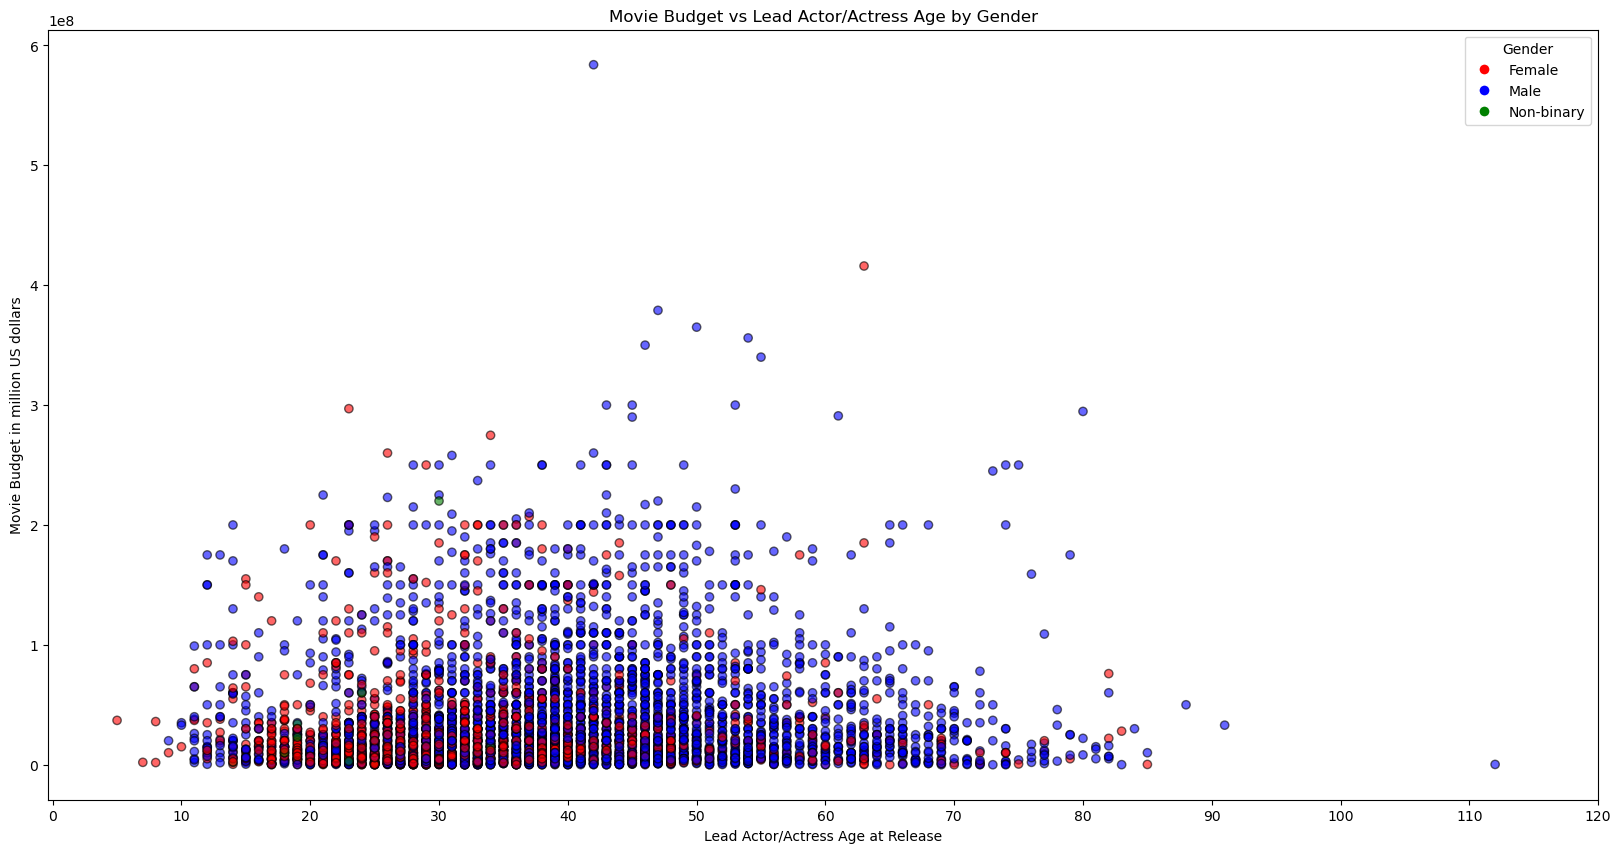

In [24]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df_movies_cast = df_movies_cast[df_movies_cast['gender'].isin([1, 2, 3])]

# Ensure gender is integer
df_movies_cast['gender_filled'] = df_movies_cast['gender'].astype(int)

gender_colors = {
    1: 'red',     # female
    2: 'blue',    # male
    3: 'green'    # non-binary
}
df_movies_cast['color'] = df_movies_cast['gender_filled'].map(gender_colors).fillna('gray')

print(df_movies_cast.loc[df_movies_cast['color'].isna(), 'gender_filled'].unique())

plt.figure(figsize=(20, 10))
plt.scatter(
    df_movies_cast['age_at_release'],
    df_movies_cast['budget'],
    c=df_movies_cast['color'],
    alpha=0.6,
    edgecolor='k'
)

plt.xlabel("Lead Actor/Actress Age at Release")
plt.ylabel("Movie Budget in million US dollars")
plt.title("Movie Budget vs Lead Actor/Actress Age by Gender")

# Set x-axis steps
plt.xticks(range(0, int(df_movies_cast['age_at_release'].max()) + 10, 10))

# Infobox
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Non-binary', markerfacecolor='green', markersize=8)
]
plt.legend(handles=legend_elements, title="Gender")

plt.show()


In [25]:
#Test med en profit column
df_movies_cast['profit'] = df_movies_cast['revenue'] - df_movies_cast['budget']

In [ ]:
gender_labels = {1: "Female", 2: "Male", 3: "Non-binary"}

df_movies_cast['gender_label'] = df_movies_cast['gender_filled'].astype(int).map(gender_labels)

df_movies_cast.to_csv("movie_data/to_streamlit.csv", index=False)

In [27]:
df_movies_cast['gender_filled'].map(gender_labels).value_counts()

gender_filled
Male          3054
Female        1236
Non-binary      17
Name: count, dtype: int64